## Final Project
#### Names: Sammy Park and Victoria Ok

#### Spotify Tracks Dataset from huggingface.co
(https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)

#### Data Description:
The dataset comprises information on various music tracks available on Spotify, encompassing diverse attributes such as artist details, album names, track names, popularity scores, duration, explicit content, and musical traits like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, and track genre. The popularity score, ranging from 0 to 100, is algorithmically determined based on the track's play count and recency. Additionally, the dataset includes details about the presence of explicit lyrics, dance suitability, acoustic nature, instrumental content, live performance likelihood, and the emotional tone conveyed by each track. 

#### Key Variables:
- track_genre: The genre in which the track belongs

#### Question: 
Can we predict the popularity of songs within specific genres, considering genre-specific traits?

#### Basic Information about the Data:
- size: 17.5+ MB
- number of entries (rows): 114,000
- number of features (columns): 21
- number of categorical columns: 6
- number of numerical columns: 15
- columns with missing values: ```artists, album_name, track_name```

In [1]:
### Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for data pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Libraries for kMeans clustering
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
### Load and preview the dataset
spotify = pd.read_csv("C:/Users/victo/Downloads/Yr. 4 Sem. 1/DS 3001 FML/ds3001-final-project/dataset.csv")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
# drop the index column, as it is not necessary
# drop the track_id column because it is a unique identifier 
spotify = spotify.drop(['index', 'track_id'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [4]:
# convert 'duration_ms' into 'duration_sec' (ms to s) for user readability
spotify['duration_sec'] = spotify['duration_ms']/1000
spotify = spotify.drop(['duration_ms'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

In [5]:
# see how many categories exist in track_genre
genres = spotify["track_genre"].value_counts()
genres

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [ ]:
## TODO: compress track_genre into smaller categories

In [6]:
# convert 'track_genre' into a category type
spotify["track_genre"] = spotify["track_genre"].astype("category")

In [7]:
# One hot encoding track_genre 
ordinal_encoder = OrdinalEncoder()
spotify[['track_genre']] = ordinal_encoder.fit_transform(spotify[['track_genre']])
spotify[['track_genre']].value_counts()

track_genre
0.0            1000
85.0           1000
83.0           1000
82.0           1000
81.0           1000
               ... 
34.0           1000
33.0           1000
32.0           1000
31.0           1000
113.0          1000
Name: count, Length: 114, dtype: int64

In [8]:
# view the categories
ordinal_encoder.categories_

[array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
        'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
        'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
        'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film

In [9]:
# view the null rows
spotify[spotify.isna().any(axis=1)]

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
65900,NaN,NaN,NaN,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,65.0,0.0


In [10]:
# drop the one value that has null values
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   explicit          113999 non-null  bool   
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  float64
 16  time_signature    113999 

In [11]:
# output basic statistics from the numerical features
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,56.499925,228.031153
std,22.304959,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,32.907978,107.296058
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,28.000000,174.066000
50%,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.000000,212.906000
75%,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000,261.506000
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000,5237.295000


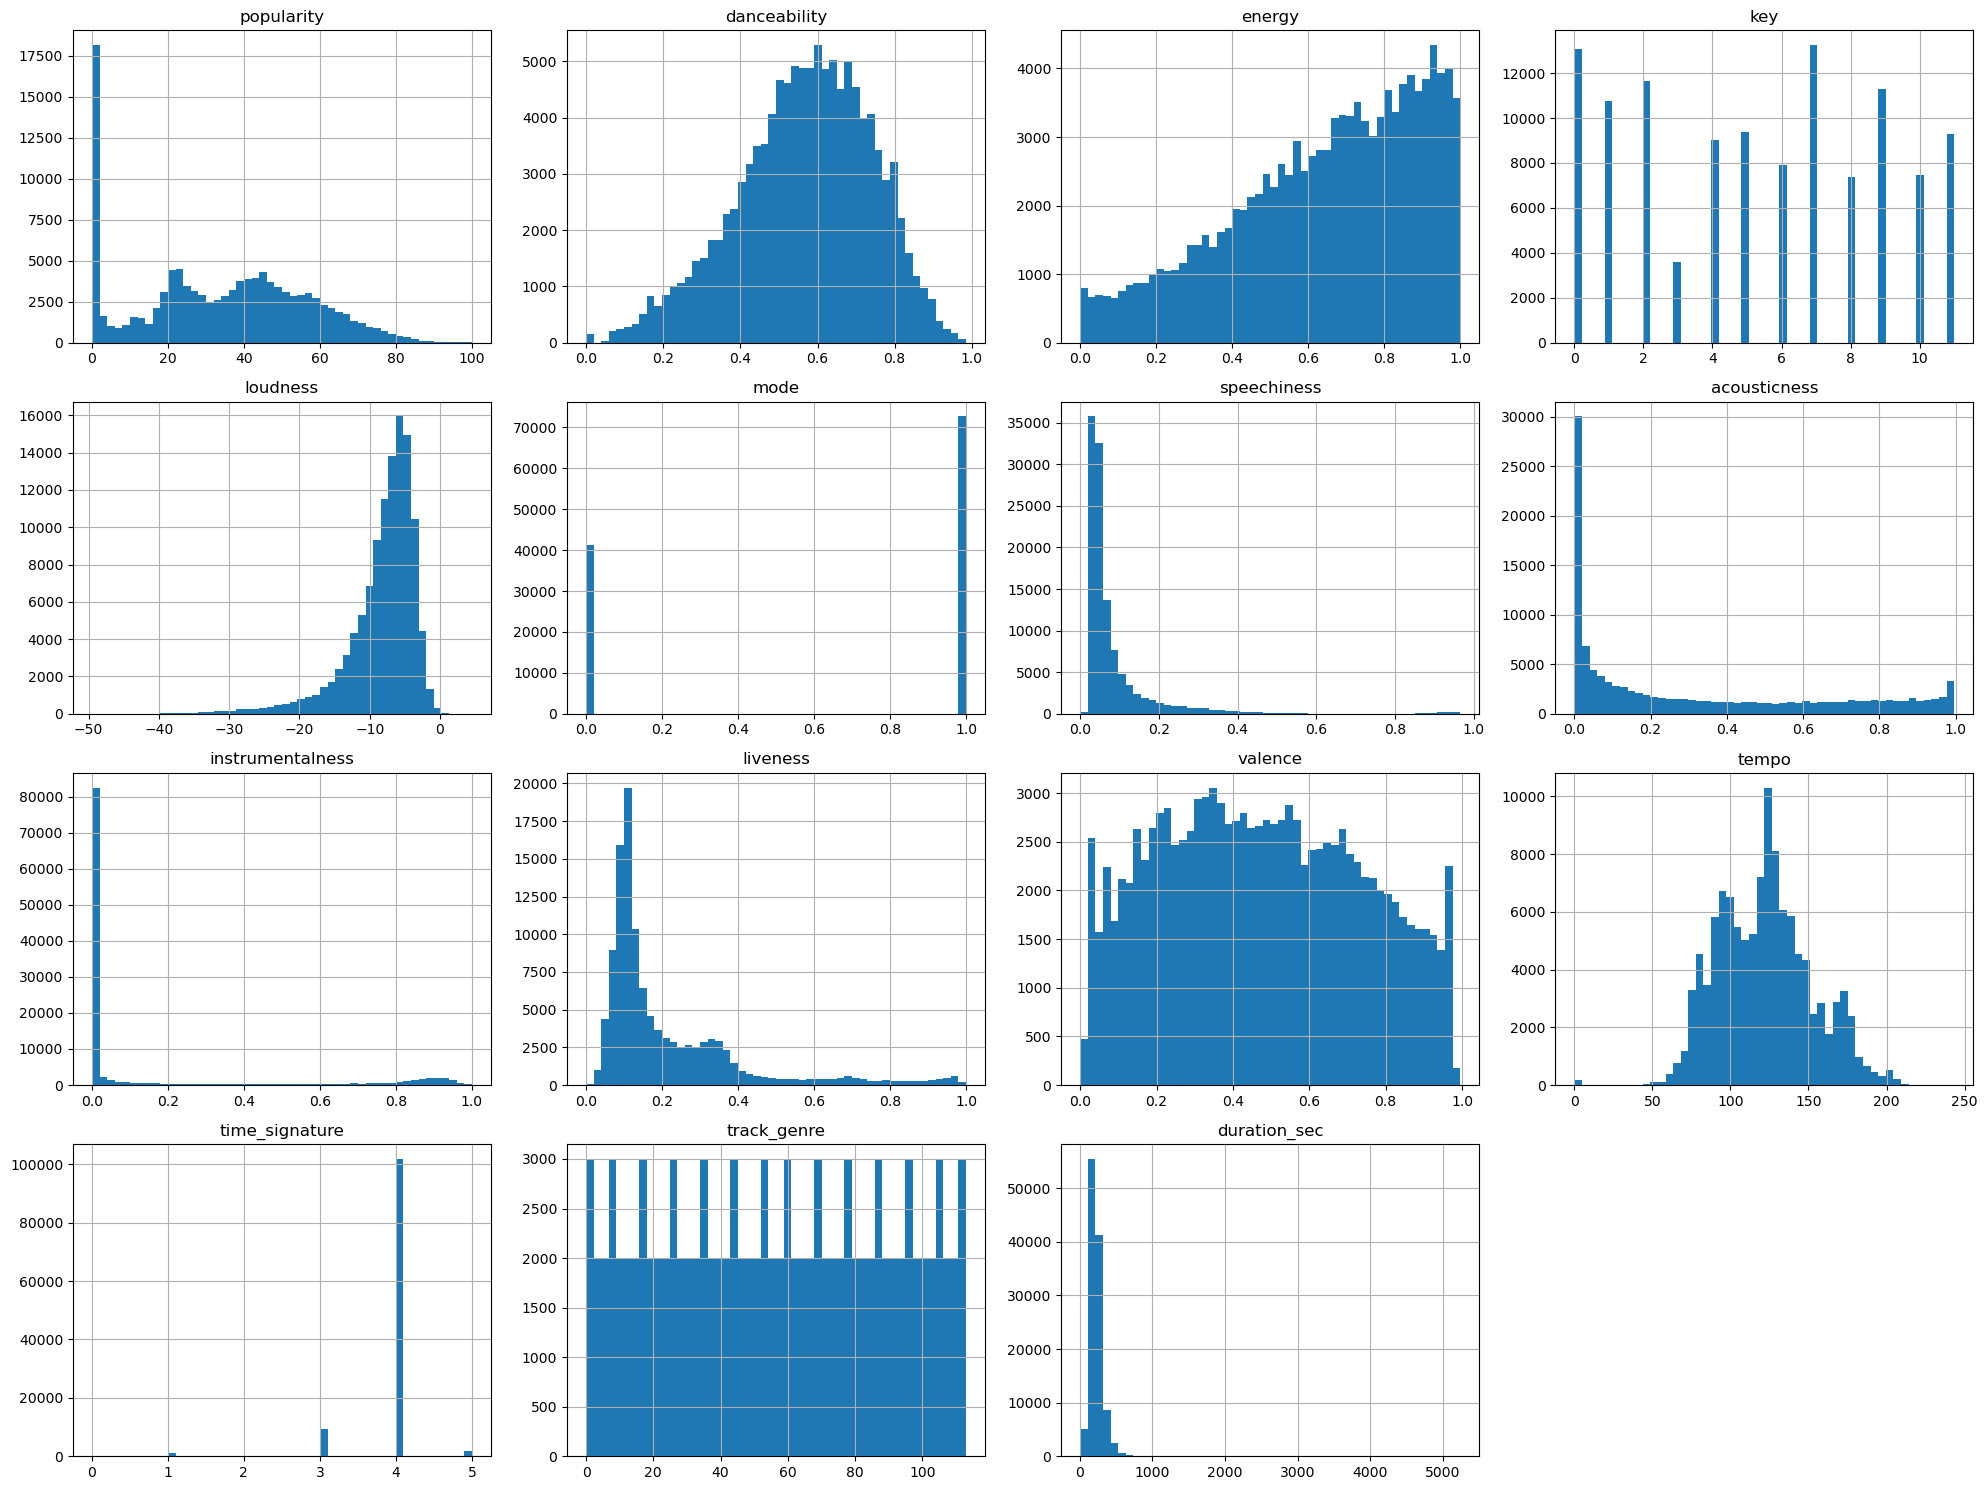

In [12]:
# visualize numerical data as histograms
spotify.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# TODO: add comments on the histogram

In [13]:
# viewing the histogram, we saw that many songs had a popularity of 0, and wanted to investigate
low_pop = spotify[(spotify['popularity']==0)]
low_pop

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
23,Jason Mraz,Coffee Moment,93 Million Miles,0,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,0.0,216.386
24,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,0.0,231.266
26,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760
27,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,0.0,273.653
28,Jason Mraz,Christmas Time,Winter Wonderland,0,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,113.0,117.226
113047,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,113.0,175.426
113048,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,113.0,193.653
113049,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,113.0,217.120


Viewing the statistics of our target variable, we want to categorize the popularity variable into 3 classes: low, average, and high popularity. After calculating the mean to be a score 33.239 and the standard deviation to be 22.305, we separate the classes by one standard deviation below and above the mean rounded down - [10, 55]. 

In [14]:
print("33rd: ", np.percentile(spotify['popularity'], 33))
print("67rd: ", np.percentile(spotify['popularity'], 67))

33rd:  22.0
67rd:  45.0


In [15]:
spotify['popularity'] = spotify.popularity.apply(lambda x: "low" if x <= 22
                                                         else ("average" if (x > 22 and x <=45)
                                                         else "high")).astype("category")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  object  
 1   album_name        113999 non-null  object  
 2   track_name        113999 non-null  object  
 3   popularity        113999 non-null  category
 4   explicit          113999 non-null  bool    
 5   danceability      113999 non-null  float64 
 6   energy            113999 non-null  float64 
 7   key               113999 non-null  int64   
 8   loudness          113999 non-null  float64 
 9   mode              113999 non-null  int64   
 10  speechiness       113999 non-null  float64 
 11  acousticness      113999 non-null  float64 
 12  instrumentalness  113999 non-null  float64 
 13  liveness          113999 non-null  float64 
 14  valence           113999 non-null  float64 
 15  tempo             113999 non-null  float64 
 16  time_si

In [16]:
duplicated = spotify.duplicated()
duplicate_indices = duplicated.index[duplicated == True].tolist()
len(duplicate_indices)

685

In [17]:
spotify = spotify.drop(duplicate_indices)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113314 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113314 non-null  object  
 1   album_name        113314 non-null  object  
 2   track_name        113314 non-null  object  
 3   popularity        113314 non-null  category
 4   explicit          113314 non-null  bool    
 5   danceability      113314 non-null  float64 
 6   energy            113314 non-null  float64 
 7   key               113314 non-null  int64   
 8   loudness          113314 non-null  float64 
 9   mode              113314 non-null  int64   
 10  speechiness       113314 non-null  float64 
 11  acousticness      113314 non-null  float64 
 12  instrumentalness  113314 non-null  float64 
 13  liveness          113314 non-null  float64 
 14  valence           113314 non-null  float64 
 15  tempo             113314 non-null  float64 
 16  time_si

In [18]:
# check that all duplicates were removed
spotify.duplicated().index[spotify.duplicated() == True].tolist()

[]

In [19]:
# check 
spotify[['popularity']].value_counts()

popularity
average       38606
low           38351
high          36357
Name: count, dtype: int64

In [20]:
# One hot encoding popularity 
spotify[['popularity']] = OrdinalEncoder().fit_transform(spotify[['popularity']])
spotify[['popularity']].value_counts()

popularity
0.0           38606
2.0           38351
1.0           36357
Name: count, dtype: int64

- 0 corresponds with average popularity
- 1 corresponds with high popularity
- 2 corresponds with low popularity

In [21]:
# split the data into predictors and labels
X = spotify.drop(columns=["popularity"], axis=1)
y = spotify['popularity']

In [22]:
# subset of the data without the artist, album name, and track name
spotify_num = X.drop(columns=['artists','album_name','track_name'], axis=1)
spotify_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113314 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   explicit          113314 non-null  bool   
 1   danceability      113314 non-null  float64
 2   energy            113314 non-null  float64
 3   key               113314 non-null  int64  
 4   loudness          113314 non-null  float64
 5   mode              113314 non-null  int64  
 6   speechiness       113314 non-null  float64
 7   acousticness      113314 non-null  float64
 8   instrumentalness  113314 non-null  float64
 9   liveness          113314 non-null  float64
 10  valence           113314 non-null  float64
 11  tempo             113314 non-null  float64
 12  time_signature    113314 non-null  int64  
 13  track_genre       113314 non-null  float64
 14  duration_sec      113314 non-null  float64
dtypes: bool(1), float64(11), int64(3)
memory usage: 13.1 MB


In [23]:
# Scale the data for kmeans
spotify_scaled = pd.DataFrame(MinMaxScaler().fit_transform(spotify_num))

In [24]:
# Run data through kmeans model
spotify_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(spotify_scaled)

In [25]:
spotify_kmeans.labels_

array([0, 1, 2, ..., 0, 2, 0])

In [26]:
# predict
label = spotify_kmeans.fit_predict(spotify_scaled)

Text(0, 0.5, 'danceability')

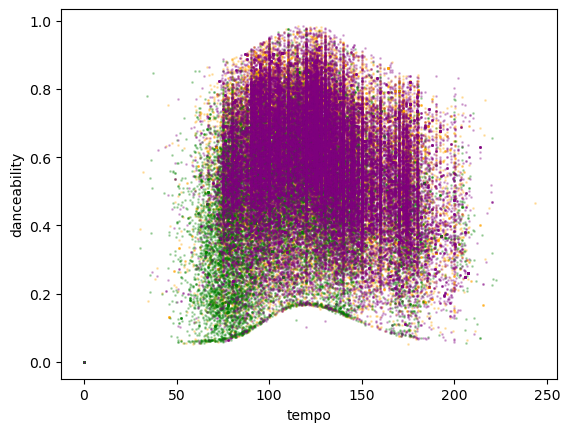

In [27]:
average_pop = spotify_num[label == 0]
high_pop = spotify_num[label == 1]
low_pop = spotify_num[label == 2]

plt.scatter(average_pop['tempo'], average_pop['danceability'], c="orange", s=1, alpha=0.25)
plt.scatter(high_pop['tempo'], high_pop['danceability'], c="green", s=1, alpha=0.25)
plt.scatter(low_pop['tempo'], low_pop['danceability'], c="purple", s=1, alpha=0.25)
plt.xlabel("tempo")
plt.ylabel("danceability")

Text(0, 0.5, 'loudness')

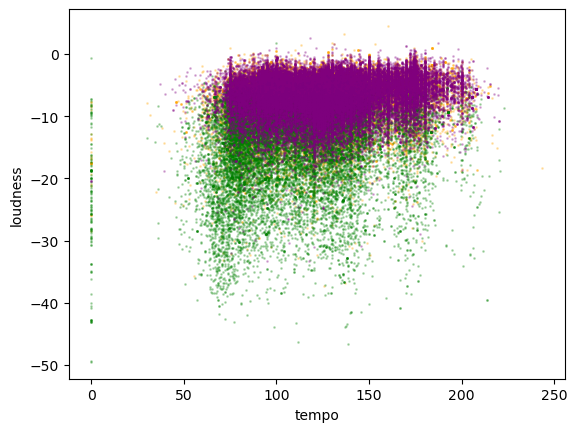

In [28]:
plt.scatter(average_pop['tempo'], average_pop['loudness'], c="orange", s=1, alpha=0.25)
plt.scatter(high_pop['tempo'], high_pop['loudness'], c="green", s=1, alpha=0.25)
plt.scatter(low_pop['tempo'], low_pop['loudness'], c="purple", s=1, alpha=0.25)
plt.xlabel("tempo")
plt.ylabel("loudness")

In [61]:
metrics.silhouette_score(spotify_scaled, label, sample_size=50000)

0.22550832833671622

### Random Forest

In [29]:
# split the data into training, testing, and validation sets
# training: 80%
# testing: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) 

In [30]:
# verify that sets were stratified:
print(y_train.value_counts())
print(y_test.value_counts())

popularity
0.0    30885
2.0    30681
1.0    29085
Name: count, dtype: int64
popularity
0.0    7721
2.0    7670
1.0    7272
Name: count, dtype: int64


In [31]:
X_train_new = X_train.drop(columns=['artists', 'album_name', 'track_name'])
X_test_new = X_test.drop(columns=['artists', 'album_name', 'track_name'])

In [32]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90651 entries, 106796 to 84655
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          90651 non-null  bool   
 1   danceability      90651 non-null  float64
 2   energy            90651 non-null  float64
 3   key               90651 non-null  int64  
 4   loudness          90651 non-null  float64
 5   mode              90651 non-null  int64  
 6   speechiness       90651 non-null  float64
 7   acousticness      90651 non-null  float64
 8   instrumentalness  90651 non-null  float64
 9   liveness          90651 non-null  float64
 10  valence           90651 non-null  float64
 11  tempo             90651 non-null  float64
 12  time_signature    90651 non-null  int64  
 13  track_genre       90651 non-null  float64
 14  duration_sec      90651 non-null  float64
dtypes: bool(1), float64(11), int64(3)
memory usage: 10.5 MB


In [33]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22663 entries, 1149 to 65702
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          22663 non-null  bool   
 1   danceability      22663 non-null  float64
 2   energy            22663 non-null  float64
 3   key               22663 non-null  int64  
 4   loudness          22663 non-null  float64
 5   mode              22663 non-null  int64  
 6   speechiness       22663 non-null  float64
 7   acousticness      22663 non-null  float64
 8   instrumentalness  22663 non-null  float64
 9   liveness          22663 non-null  float64
 10  valence           22663 non-null  float64
 11  tempo             22663 non-null  float64
 12  time_signature    22663 non-null  int64  
 13  track_genre       22663 non-null  float64
 14  duration_sec      22663 non-null  float64
dtypes: bool(1), float64(11), int64(3)
memory usage: 2.6 MB


In [36]:
param_grid = [
    {'n_estimators': [10, 25, 50, 70], 'max_features': [5, 10, 15]},
  ]

forest_reg = RandomForestClassifier(random_state=42, max_samples=1000)
grid_search_for = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search_for.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=1000,
                                              random_state=42),
             param_grid=[{'max_features': [5, 10, 15],
                          'n_estimators': [10, 25, 50, 70]}],
             return_train_score=True, scoring='accuracy')

In [37]:
grid_search_for.best_params_

{'max_features': 15, 'n_estimators': 70}

In [36]:
RFC = RandomForestClassifier(n_estimators=1000, 
                max_features= 15, 
                bootstrap= True, 
                max_samples = 10000, 
                oob_score =True, 
                random_state= 42,
                n_jobs=-1,
                verbose=True)

In [37]:
spotify_RFC= RFC.fit(X_train_new, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


In [38]:
y_pred = spotify_RFC.predict(X_train_new)
y_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    6.1s finished


array([0., 0., 2., ..., 1., 0., 1.])

In [39]:
print("balanced accuracy: ", metrics.balanced_accuracy_score(y_train, y_pred))

balanced accuracy:  0.7956502508845986


In [40]:
# precision
print("precision: ", metrics.precision_score(y_train, y_pred, average="weighted"))

precision:  0.7962116405677979


In [41]:
# recall
print("recall: ", metrics.recall_score(y_train, y_pred, average='weighted'))

recall:  0.796152276312451


In [42]:
# accuracy
print("accuracy: ", spotify_RFC.score(X_train_new, y_train))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    4.8s


accuracy:  0.796152276312451


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    5.8s finished


In [43]:
# out of bag error:
print('OOB error rate: ' + str(1-spotify_RFC.oob_score_))

OOB error rate: 0.31796670748254297


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    6.0s finished


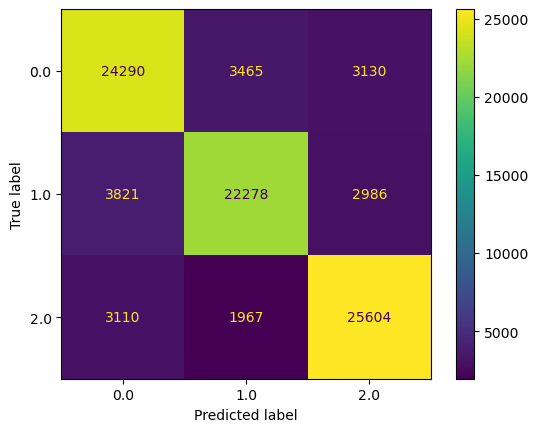

In [44]:
ConfusionMatrixDisplay.from_estimator(spotify_RFC, X_train_new, y_train)

In [45]:
print(pd.DataFrame(spotify_RFC.feature_importances_,index = X_train_new.columns, columns=['importance']).sort_values('importance', ascending=False))

                  importance
track_genre         0.199848
duration_sec        0.084528
acousticness        0.081128
valence             0.075966
danceability        0.075113
speechiness         0.073645
loudness            0.072669
liveness            0.071975
tempo               0.071865
energy              0.069763
instrumentalness    0.063226
key                 0.039220
mode                0.009034
time_signature      0.006319
explicit            0.005700


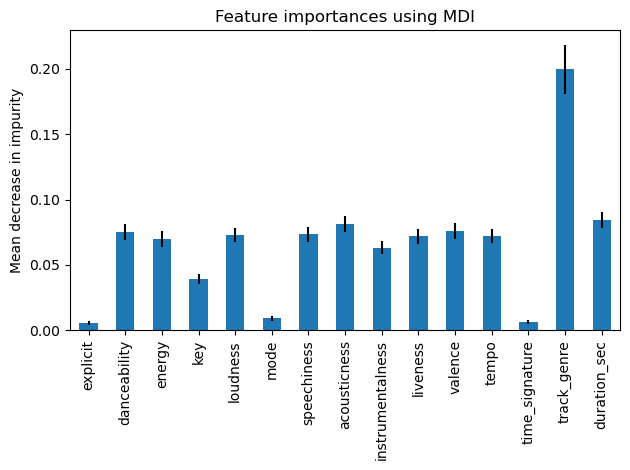

In [46]:
#Here we compute both the mean and standard
# deviation of accumulation of the impurity decrease within each tree.
importances = spotify_RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in spotify_RFC.estimators_], axis=0)

#graph it
forest_importances = pd.Series(importances, index=X_train_new.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()